Configurações padrões:
- `Tema:` dark
- `Cor não-evento:` steelblue
- `Cor evento:` crimson
- `pointsize:` 55
- `linewidth:` 3
- `markersize:` 10 ou 5.

# Figura para explicar a técnica SMOTE

[[ 5 16 15 14  4]]


C:\Users\zheag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


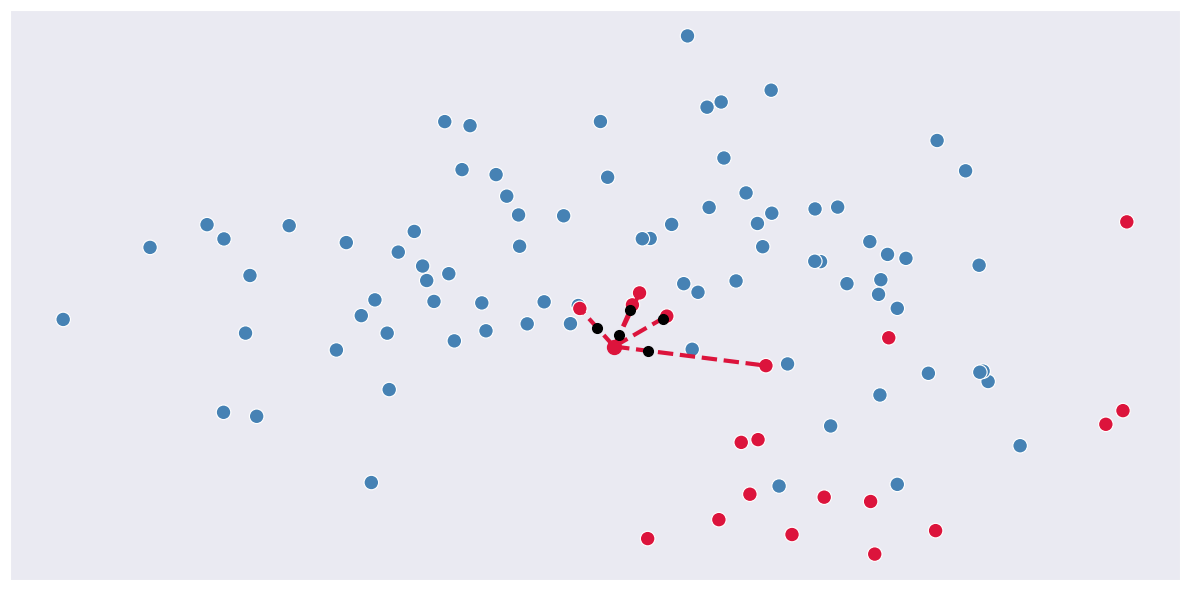

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from imblearn.datasets import make_imbalance
from sklearn.neighbors import NearestNeighbors
sns.set_style('dark')

np.random.seed(5)

# Geração do conjunto de dados
X, y = make_moons(n_samples=200, noise=0.35, random_state=42)
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 80, 1 : 20}, random_state = 42)
df = pd.DataFrame(np.column_stack((X_res, y_res)), columns = ['feature 1', 'feature 2', 'y'])

plt.figure(figsize = (12, 6))
point_size = 110 # Antes usava 70

ax = sns.scatterplot(
    x = 'feature 1', 
    y = 'feature 2', 
    data = df.drop(84), 
    hue = 'y', 
    palette = ['steelblue', 'crimson'], 
    legend = False,
    s = point_size
)

# Cria o ponto com marcador de X
ax.plot(df.iloc[84, 0], df.iloc[84, 1], color = 'crimson', marker = 'o', markersize = 10)
# Pega os vizinhos mais próximos de um ponto específico
knn = NearestNeighbors(n_neighbors = 5)
knn.fit(
    df[df['y'] == 1].drop('y', axis = 1).drop(84), # Classe minoritária sem o ponto de interessses
    df[df['y'] == 1]['y'].drop(84)
)

print(knn.kneighbors(
    df.iloc[84, :2].values.reshape(1, -1) # k-vizinhos do ponto de interesse
)[1])
# Cria as linhas entre o ponto e seus vizinhos
for row in df[df['y'] == 1].drop('y', axis = 1).drop(84).iloc[[4,5,14,15,16]].iterrows():
    ax.plot([df.iloc[84, 0], row[1][0]], [df.iloc[84, 1], row[1][1]], color = 'crimson', linestyle = '--', linewidth = 3)
# Cria os pontos no segmento de reta
for row in df[df['y'] == 1].drop('y', axis = 1).drop(84).iloc[[4,5,14,15,16]].iterrows():
    lamb = np.random.rand(1)
    ax.plot(
    df.iloc[84, 0] + lamb * (row[1][0] - df.iloc[84, 0]),
     df.iloc[84, 1] + lamb * ((row[1][1]) - df.iloc[84, 1]), color = 'black', marker = 'o', markersize = 7
)

# Ajuste dos detalhes finais
ax.set(xticklabels = [], yticklabels = [], xlabel = None, ylabel = None)
plt.tight_layout()
plt.show()

In [2]:

from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 5)
knn.fit(
    df[df['y'] == 1].drop('y', axis = 1).drop(84), # Classe minoritária sem o ponto de interessses
    df[df['y'] == 1]['y'].drop(84)
)

vizinhos = knn.kneighbors(
    df.iloc[84, :2].values.reshape(1, -1) # k-vizinhos do ponto de interesse
)[1]

vizinhos

C:\Users\zheag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([[ 5, 16, 15, 14,  4]], dtype=int64)